In [164]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

train_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
eval_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [165]:
def read_dataframe(file_name):
    df = pd.read_parquet(file_name)
    df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
    df = df[(df['duration'] >= 10) & (df['duration'] <= 60)]
    df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
    return df

In [166]:
train_df = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
eval_df = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [167]:
train_dicts = train_df[['PU_DO','trip_distance']].to_dict(orient='records')
eval_dicts = eval_df[['PU_DO','trip_distance']].to_dict(orient='records')

In [168]:
dv = DictVectorizer()

In [169]:
X_train = dv.fit_transform(train_dicts)
X_eval = dv.transform(eval_dicts)

In [170]:
y_train = train_df['duration']
y_eval = eval_df['duration']

In [171]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [172]:
train_pred = model.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


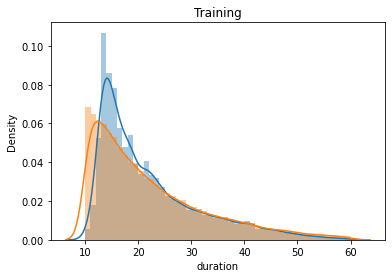

In [173]:
sns.distplot(train_pred, label='Prediction')
sns.distplot(y_train, label='Actual')
plt.title('Training')
plt.show()

In [174]:
mean_squared_error(y_train, train_pred, squared=False)

4.7532702579256725

In [175]:
eval_pred = model.predict(X_eval)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


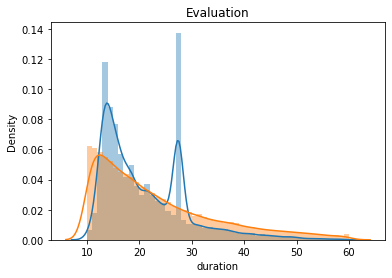

In [176]:
sns.distplot(eval_pred, label='Prediction')
sns.distplot(y_eval, label='Actual')
plt.title('Evaluation')
plt.show()

In [177]:
mean_squared_error(y_eval, eval_pred, squared=False)

8.223738735219392

In [178]:
with open('models/homework.bin', 'wb') as file:
    pickle.dump((dv, model), file)